## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 1 `( Data Cleaning )`

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import scipy as sc
import seaborn as sns
import re
from skimpy import clean_columns

C:\Users\iayav\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_json('scout_car.json' , lines = True)
df.T

,0,1,2,3,4,5,6,7,8,9,...,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sportback 1.6 TDI S-TRONIC S-LINE*NAVI|XENON*,Sportback 1.4 TDI admired S tronic,SPB 1.6 TDI S-tronic Metal plus + Xeno,SPORTBACK TFSI ULTRA 95 S-TRONIC AMB.,...,Limited Blue dCi 200 EDC,TCe 225 EDC INITIALE PDC SHZ BOSE KLIMA,ELYSEE ENERGY dCi 160 EDC,Blue dCi 200CV EDC Executive 4Control,INITIALE Paris TCe 225 EDC GPF ACC EU6,Blue dCi 200CV EDC Executive 4Control,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Blue dCi 200 EDC Initiale Paris Leder LED Navi...,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
price,15770,14500,14640,14500,16790,15090,16422,14480,16700,17990,...,39990,39980,39980,39950,39950,39950,39885,39875,39700,40999
vat,VAT deductible,Price negotiable,VAT deductible,None,None,None,VAT deductible,VAT deductible,None,None,...,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km","63,668 km","62,111 km","14,986 km","57,000 km","16,103 km",...,"3,500 km","8,500 km",100 km,- km,"1,000 km",- km,"9,900 km",15 km,10 km,- km
registration,01/2016,03/2017,02/2016,08/2016,05/2016,02/2016,03/2016,02/2016,02/2016,06/2017,...,05/2019,02/2019,02/2019,-/-,04/2019,-/-,01/2019,03/2019,06/2019,01/2019
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner,1 previous owner,1 previous owner,1 previous owner,1 previous owner,None,...,None,1 previous owner,1 previous owner,None,None,None,1 previous owner,1 previous owner,None,1 previous owner
kW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [4]:
df = clean_columns(df)
df.T

42 column names have been cleaned

,0,1,2,3,4,5,6,7,8,9,...,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sportback 1.6 TDI S-TRONIC S-LINE*NAVI|XENON*,Sportback 1.4 TDI admired S tronic,SPB 1.6 TDI S-tronic Metal plus + Xeno,SPORTBACK TFSI ULTRA 95 S-TRONIC AMB.,...,Limited Blue dCi 200 EDC,TCe 225 EDC INITIALE PDC SHZ BOSE KLIMA,ELYSEE ENERGY dCi 160 EDC,Blue dCi 200CV EDC Executive 4Control,INITIALE Paris TCe 225 EDC GPF ACC EU6,Blue dCi 200CV EDC Executive 4Control,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Blue dCi 200 EDC Initiale Paris Leder LED Navi...,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
price,15770,14500,14640,14500,16790,15090,16422,14480,16700,17990,...,39990,39980,39980,39950,39950,39950,39885,39875,39700,40999
vat,VAT deductible,Price negotiable,VAT deductible,None,None,None,VAT deductible,VAT deductible,None,None,...,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km","63,668 km","62,111 km","14,986 km","57,000 km","16,103 km",...,"3,500 km","8,500 km",100 km,- km,"1,000 km",- km,"9,900 km",15 km,10 km,- km
registration,01/2016,03/2017,02/2016,08/2016,05/2016,02/2016,03/2016,02/2016,02/2016,06/2017,...,05/2019,02/2019,02/2019,-/-,04/2019,-/-,01/2019,03/2019,06/2019,01/2019
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner,1 previous owner,1 previous owner,1 previous owner,1 previous owner,None,...,None,1 previous owner,1 previous owner,None,None,None,1 previous owner,1 previous owner,None,1 previous owner
k_w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   k_w                            0 non-null      float64
 10  hp                             15919 non-null  object 
 11  type                           15917 non-null  object 
 12  previous_owners                9279 non-null  

In [6]:
df.shape

(15919, 54)

In [7]:
df.isnull().sum()

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
k_w                              15919
hp                                   0
type                                 2
previous_owners                   6640
next_inspection                  12384
inspection_new                   11987
warranty                          5420
full_service                      7704
non_smoking_vehicle               8742
null                                 0
make                                 0
model                                0
offer_number                      3175
first_registration                1597
body_color                         597
paint_type                        5772
body_color_original      

In [8]:
df.describe(include =[object]).T

,count,unique,top,freq
url,15919,15919,https://www.autoscout24.com//offers/audi-a1-sp...,1
make_model,15919,9,Audi A3,3097
short_description,15873,10001,SPB 1.6 TDI 116 CV S tronic Sport,64
body_type,15859,9,Sedans,7903
vat,11406,2,VAT deductible,10980
km,15919,6690,10 km,1045
registration,15919,48,-/-,1597
prev_owner,9091,4,1 previous owner,8294
hp,15919,81,85 kW,2542
type,15917,169,"[, Used, , Diesel (Particulate Filter)]",3475


In [9]:
pd.set_option("display.precision" , 2)
              
# To set the digits after decimal 2 instead of 5

In [10]:
percentage_null = pd.DataFrame((df.isnull().sum() / df.shape[0])*100 ,  columns = ["percentage_null"])
percentage_null

,percentage_null
url,0.00
make_model,0.00
short_description,0.29
body_type,0.38
price,0.00
vat,28.35
km,0.00
registration,0.00
prev_owner,42.89
k_w,100.00


 Dropping columns that have missing values more than 90%

In [11]:
def df_nans(df, limit):
    missing = (df.isnull().sum() / df.shape[0])*100
    return missing.loc[lambda x : x >= limit]

In [12]:
df_nans(df, 90)

k_w                              100.00
electricity_consumption           99.14
last_service_date                 96.44
other_fuel_types                  94.47
availability                      96.01
last_timing_belt_service_date     99.90
available_from                    98.29
dtype: float64

In [13]:
drop_columns = df_nans(df,90).index
drop_columns

Index(['k_w', 'electricity_consumption', 'last_service_date',
       'other_fuel_types', 'availability', 'last_timing_belt_service_date',
       'available_from'],
      dtype='object')

In [14]:
df.drop(drop_columns, axis = 1 , inplace=True)
df.drop("null" , axis = 1 , inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    15919 non-null  object
 1   make_model             15919 non-null  object
 2   short_description      15873 non-null  object
 3   body_type              15859 non-null  object
 4   price                  15919 non-null  int64 
 5   vat                    11406 non-null  object
 6   km                     15919 non-null  object
 7   registration           15919 non-null  object
 8   prev_owner             9091 non-null   object
 9   hp                     15919 non-null  object
 10  type                   15917 non-null  object
 11  previous_owners        9279 non-null   object
 12  next_inspection        3535 non-null   object
 13  inspection_new         3932 non-null   object
 14  warranty               10499 non-null  object
 15  full_service       

### Examination of columns 

### URL

In [16]:
df.url.value_counts(dropna= False) # URL Column

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

### MAKE_MODEL

In [17]:
df.make_model.value_counts(dropna= False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

### MAKE

In [18]:
df.make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: make, dtype: int64

In [19]:
df["make"] = df.make.str.strip("\n")

In [20]:
df.make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

### MODEL

In [21]:
df.model.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: model, dtype: int64

In [22]:
df.model = df.model.apply(lambda x : x[1])

# df["model"].map(lambda x : x[1] , na_action = "ignore")

df.model 

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: model, Length: 15919, dtype: object

In [23]:
df.model.value_counts(dropna = False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

In [24]:
df.drop(["make" , "model"] , axis = 1 , inplace= True)

Since model and make columns contain the same data with Make_Model and the data is unorganized, the columns have dropped

### SHORT_DESCRIPTION

In [25]:
df.short_description.value_counts(dropna= False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
NaN                                               46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [26]:
df.drop("short_description" , axis = 1 , inplace = True)

### DESCRIPTION

In [27]:
df.description.value_counts(dropna= False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [28]:
df.drop("description" , axis = 1 , inplace = True)

There is no valuable information observed in that column, hence dropped.

### Body Type

In [29]:
df.body_type.value_counts(dropna = False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

### Body

In [30]:
df.body.astype(str).value_counts(dropna = False)

['\n', 'Sedans', '\n']           7903
['\n', 'Station wagon', '\n']    3553
['\n', 'Compact', '\n']          3153
['\n', 'Van', '\n']               783
['\n', 'Other', '\n']             290
['\n', 'Transporter', '\n']        88
nan                                60
['\n', 'Off-Road', '\n']           56
['\n', 'Coupe', '\n']              25
['\n', 'Convertible', '\n']         8
Name: body, dtype: int64

In [31]:
df.drop("body" , axis = 1 , inplace = True)

The columns of body_type and body contains the same information. body column is dropped

### Price (Target Column)

In [32]:
df.price.value_counts(dropna = False )

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [33]:
df.price.isnull().sum()

0

C:\Users\iayav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


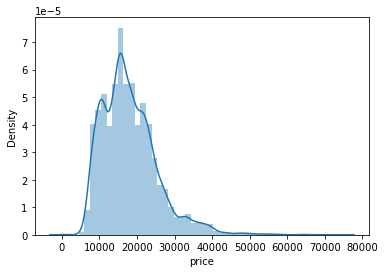

In [34]:
sns.distplot(df.price);

C:\Users\iayav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


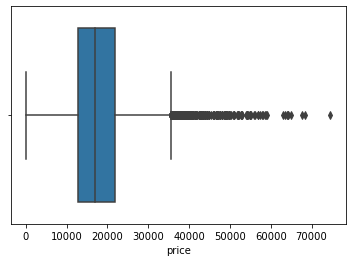

In [35]:
sns.boxplot(df.price);

### VAT

In [36]:
df.vat.value_counts(dropna = False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

### KM

In [37]:
df.km 

0        56,013 km
1        80,000 km
2        83,450 km
3        73,000 km
4        16,200 km
           ...    
15914         - km
15915     9,900 km
15916        15 km
15917        10 km
15918         - km
Name: km, Length: 15919, dtype: object

In [38]:
df["km"] = df.km.str.replace("\W+", "").str.replace("\D+", "")

#df.km.str.replace(',', '').str.extract('(\d{1,8})').astype('float')
                         # str.extract('(\d+)')

df["km"]

C:\Users\iayav\AppData\Local\Temp\ipykernel_8252\2408065943.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["km"] = df.km.str.replace("\W+", "").str.replace("\D+", "")


0        56013
1        80000
2        83450
3        73000
4        16200
         ...  
15914         
15915     9900
15916       15
15917       10
15918         
Name: km, Length: 15919, dtype: object

The cleaning of commas and "km" strings have removed

### Registraion

In [39]:
df.registration.value_counts()

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [40]:
df.drop("registration" , axis = 1 , inplace = True)

### Previous Owner

In [41]:
df.prev_owner.value_counts(dropna = False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [42]:
df.prev_owner = df.prev_owner.str.replace("\D+" , "")

C:\Users\iayav\AppData\Local\Temp\ipykernel_8252\2162906624.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.prev_owner = df.prev_owner.str.replace("\D+" , "")


In [43]:
df.prev_owner.head()

0       2
1    None
2       1
3       1
4       1
Name: prev_owner, dtype: object

String values are not suitable for ML Format, they're elininated and the integer format is kept.

### HP

In [44]:
df.hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
84 kW        1
195 kW       1
44 kW        1
239 kW       1
9 kW         1
Name: hp, Length: 81, dtype: int64

In [45]:
df.hp = df.hp.replace("\D+" , "" , regex=True)

In [46]:
df.hp.value_counts(dropna= False)

85     2542
66     2122
81     1402
100    1308
110    1112
       ... 
84        1
195       1
44        1
239       1
9         1
Name: hp, Length: 81, dtype: int64

### Type 

In [47]:
df.type.astype(str).value_counts(dropna= False) 

['', 'Used', '', 'Diesel (Particulate Filter)']                                                                                 3475
['', 'Used', '', 'Diesel']                                                                                                      2516
['', 'Used', '', 'Gasoline']                                                                                                    2367
['', 'Used', '', 'Super 95']                                                                                                    1818
['', 'Pre-registered', '', 'Super 95']                                                                                           500
                                                                                                                                ... 
['', 'New', '', 'Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95']       1
['', 'Used', '', 'Super 95 / Super Plus 98 / Super E10 95 / Super Plu

In [48]:
df["type"] = [item[1] if type(item) == list else item for item in df["type"]]
df["type"]

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: type, Length: 15919, dtype: object

The target data achieved from messy type data

### Previous Owners

In [49]:
df.drop("previous_owners" , axis = 1 , inplace = True)

Duplicate column

### Next Inspection

In [50]:
df["next_inspection"].astype(str).value_counts(dropna = False)

nan                                           12384
\n04/2022\n                                      62
\n03/2021\n                                      38
\n03/2022\n                                      36
\n06/2021\n                                      34
                                              ...  
['\n12/2018\n', '\n97 g CO2/km (comb)\n']         1
['\n03/2022\n', '\n1 (No sticker)\n']             1
['\n05/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n06/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n01/2022\n', '\n168 g CO2/km (comb)\n']        1
Name: next_inspection, Length: 1400, dtype: int64

In [51]:
df.drop("next_inspection" , axis = 1 , inplace = True)

According to the domain knowledge and the null percentage, it is logical to drop this column.

### Inspection New

In [52]:
df["inspection_new"].astype(str).value_counts(dropna = False)

nan                                                                                                            11987
['\nYes\n', '\nEuro 6\n']                                                                                        523
\nYes\n                                                                                                          362
['\nYes\n', '\n102 g CO2/km (comb)\n']                                                                           174
['\nYes\n', '\n4 (Green)\n']                                                                                     166
                                                                                                               ...  
['\nYes\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)', '\n', '4.9 l/100 km (country)', '\n']            1
['\nYes\n', '\n', '6.8 l/100 km (comb)', '\n', '8.5 l/100 km (city)', '\n', '6.1 l/100 km (country)', '\n']        1
['\nYes\n', '\n', '4.1 l/100 km (comb)', '\n', '7.5 l/100 km (ci

### Will be handled later on

def deleting(arr):
    if arr.is_number():
        return arr 
    elif type(arr) == list: 
        res = []
        for word in arr:
            if word:
                word.replace("\n","")
                res.append(word)
        return res

df["inspection_new"].apply(lambda item: deleting(item) )

In [53]:
df["inspection_new"] = [item[0] if type(item) == list else item for item in df["inspection_new"]]
df["inspection_new"] = df["inspection_new"].str.strip("\n")
df["inspection_new"].value_counts(dropna = False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

In [54]:
df["inspection_new"].value_counts(dropna = False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

### Warranty

In [55]:
df["warranty"].astype(str).value_counts(dropna = False)

nan                                                                                                                5420
['\n', '\n', '\nEuro 6\n']                                                                                         1868
\n12 months\n                                                                                                      1177
\n                                                                                                                  979
\n24 months\n                                                                                                       566
                                                                                                                   ... 
['\n72 months\n', '\n125 g CO2/km (comb)\n']                                                                          1
['\n60 months\n', '\n14 g CO2/km (comb)\n']                                                                           1
['\n24 months\n', '\n121 g CO2/km (comb)

In [56]:
df["warranty"] = [item[0] if type(item) == list else item for item in df["warranty"]]
df["warranty"] = df["warranty"].str.strip("\n").str.replace("\D+", "", regex = True)
df["warranty"].value_counts(dropna = False)                              

       5646
NaN    5420
12     2594
24     1118
60      401
36      279
48      149
6       125
72       59
3        33
23       11
18       10
20        7
25        6
2         5
16        4
26        4
50        4
1         3
19        3
13        3
4         3
34        3
21        2
9         2
14        2
45        2
17        2
28        2
11        2
22        2
46        2
8         1
7         1
15        1
10        1
56        1
49        1
65        1
47        1
33        1
40        1
30        1
Name: warranty, dtype: int64

### Full Service

In [57]:
df["full_service"].astype(str).value_counts(dropna = False)

nan                                                                                                             7704
['\n', '\n', '\n4 (Green)\n']                                                                                   2235
['\n', '\n', '\nEuro 6\n']                                                                                      2097
['\n', '\n']                                                                                                    1702
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                 399
                                                                                                                ... 
['\n', '\n', '\n80 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n84 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)

In [58]:
df.drop("full_service" , axis =1 , inplace = True)

The remaining data after cleaning were not have correlation with each other. That is why the column is eliminated.

### Non-smoking Vehicle (incomplete)

In [59]:
df["non_smoking_vehicle"].astype(str).value_counts(dropna = False)

nan                                                                                                             8742
['\n', '\n']                                                                                                    3647
['\n', '\n', '\n4 (Green)\n']                                                                                   1240
['\n', '\n', '\nEuro 6\n']                                                                                      1127
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                 345
                                                                                                                ... 
['\n', '\n', '\n', '5.6 l/100 km (comb)', '\n', '7.3 l/100 km (city)', '\n', '4.7 l/100 km (country)', '\n']       1
['\n', '\n', '\n122 g CO2/km (comb)\n']                                                                            1
['\n', '\n', '\n158 g CO2/km (comb)\n']                         

In [60]:
df["non_smoking_vehicle"].isnull().sum()*100/df["non_smoking_vehicle"].shape[0]

54.91550976820152

In [61]:
df.drop("non_smoking_vehicle" , axis = 1 , inplace = True)

The data in the column is too complex and irrelevant and the null percentage is relatively high, eliminated.

### Offer Number

In [62]:
df["offer_number"].astype(str).value_counts(dropna = False)

nan                                                 3175
['\nLT67679\n']                                       27
['\nUN89904\n']                                       27
['\nXJ38068\n']                                       27
['\nJV03654\n']                                       27
                                                    ... 
['\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n']       1
['\n6701576\n']                                        1
['\n6701569\n']                                        1
['\n158121\n']                                         1
['\nRe_30000008029\n']                                 1
Name: offer_number, Length: 11441, dtype: int64

In [63]:
df.drop("offer_number" , axis = 1 , inplace = True)

According to the domain knowledge, offer number has no influence on the price of the car. It is dropped.

### Country Version

In [64]:
df["country_version"].astype(str).value_counts(dropna = False)

nan                       8333
['\nGermany\n']           4502
['\nItaly\n']             1038
['\nEuropean Union\n']     507
['\nNetherlands\n']        464
['\nSpain\n']              325
['\nBelgium\n']            314
['\nAustria\n']            208
['\nCzech Republic\n']      52
['\nPoland\n']              49
['\nFrance\n']              38
['\nDenmark\n']             33
['\nHungary\n']             28
['\nJapan\n']                8
['\nSlovakia\n']             4
['\nCroatia\n']              4
['\nSweden\n']               3
['\nRomania\n']              2
['\nBulgaria\n']             2
['\nLuxembourg\n']           1
['\nSwitzerland\n']          1
['\nSlovenia\n']             1
['\nEgypt\n']                1
['\nSerbia\n']               1
Name: country_version, dtype: int64

In [65]:
df["country_version"] = [item[0] if type(item) == list else item for item in df["country_version"]]
df["country_version"] = df["country_version"].str.strip("\n")
df["country_version"].value_counts(dropna = False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_version, dtype: int64

### First Registration

In [66]:
df["first_registration"].astype(str).value_counts(dropna = False)

['\n', '2018', '\n']    4522
['\n', '2016', '\n']    3674
['\n', '2017', '\n']    3273
['\n', '2019', '\n']    2853
nan                     1597
Name: first_registration, dtype: int64

In [67]:
df["first_registration"] = [item[1] if type(item) == list else item for item in df["first_registration"]]
df["first_registration"].value_counts(dropna = False)

2018    4522
2016    3674
2017    3273
2019    2853
NaN     1597
Name: first_registration, dtype: int64

### Body Color

In [68]:
df["body_color"].astype(str).value_counts(dropna = False)

['\n', 'Black', '\n']     3745
['\n', 'Grey', '\n']      3505
['\n', 'White', '\n']     3406
['\n', 'Silver', '\n']    1647
['\n', 'Blue', '\n']      1431
['\n', 'Red', '\n']        957
nan                        597
['\n', 'Brown', '\n']      289
['\n', 'Green', '\n']      154
['\n', 'Beige', '\n']      108
['\n', 'Yellow', '\n']      51
['\n', 'Violet', '\n']      18
['\n', 'Bronze', '\n']       6
['\n', 'Orange', '\n']       3
['\n', 'Gold', '\n']         2
Name: body_color, dtype: int64

In [69]:
df["body_color"] = [item[1] if type(item) == list else item for item in df["body_color"]]
df["body_color"].value_counts(dropna = False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

### Paint Type

In [70]:
df["paint_type"].astype(str).value_counts(dropna = False)

['\nMetallic\n']       9794
nan                    5772
['\nUni/basic\n']       347
['\nPerl effect\n']       6
Name: paint_type, dtype: int64

In [71]:
df["paint_type"] = [item[0] if type(item) == list else item for item in df["paint_type"]]
df["paint_type"] = df["paint_type"].str.strip("\n")
df["paint_type"].value_counts(dropna = False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

### Body Color Original

In [72]:
df["body_color_original"].astype(str).value_counts(dropna = False)

nan                                      3759
['\nOnyx Schwarz\n']                      338
['\nBianco\n']                            282
['\nMythosschwarz Metallic\n']            238
['\nBrillantschwarz\n']                   216
                                         ... 
['\nRouge-Braun (G0Y)\n']                   1
['\nVARI COLRI DISPONIBILI\n']              1
['\nKokosnussbraun Metallic\n']             1
['\nFarbe frei wählbar\n']                  1
['\nPerlmutt-Weiß Metallic (Weiß)\n']       1
Name: body_color_original, Length: 1928, dtype: int64

In [73]:
df["body_color_original"] = [item[0] if type(item) == list else item for item in df["body_color_original"]]
df["body_color_original"] = df["body_color_original"].str.strip("\n")
df["body_color_original"].value_counts(dropna = False)

NaN                              3759
Onyx Schwarz                      338
Bianco                            282
Mythosschwarz Metallic            238
Brillantschwarz                   216
                                 ... 
Rouge-Braun (G0Y)                   1
VARI COLRI DISPONIBILI              1
Kokosnussbraun Metallic             1
Farbe frei wählbar                  1
Perlmutt-Weiß Metallic (Weiß)       1
Name: body_color_original, Length: 1928, dtype: int64

### Upholstery

In [74]:
df["upholstery"].astype(str).value_counts(dropna = False)

['\nCloth, Black\n']           5821
nan                            3720
['\nPart leather, Black\n']    1121
['\nCloth\n']                  1005
['\nCloth, Grey\n']             891
['\nCloth, Other\n']            639
['\nFull leather, Black\n']     575
['\nBlack\n']                   491
['\nGrey\n']                    273
['\nOther, Other\n']            182
['\nPart leather\n']            140
['\nFull leather\n']            139
['\nFull leather, Brown\n']     116
['\nPart leather, Grey\n']      116
['\nOther, Black\n']            110
['\nFull leather, Other\n']      72
['\nFull leather, Grey\n']       67
['\nPart leather, Other\n']      65
['\nOther\n']                    56
['\nPart leather, Brown\n']      50
['\nalcantara, Black\n']         47
['\nVelour, Black\n']            36
['\nFull leather, Beige\n']      36
['\nCloth, Brown\n']             28
['\nVelour\n']                   16
['\nOther, Grey\n']              15
['\nCloth, Beige\n']             13
['\nBrown\n']               

In [75]:
df["upholstery"] = [item[0] if type(item) == list else item for item in df["upholstery"]]
df["upholstery"] = df["upholstery"].str.strip("\n")
df["upholstery"].value_counts(dropna = False)

Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Full leather, Brown     116
Part leather, Grey      116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Velour, Black            36
Full leather, Beige      36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Brown                    12
Cloth, Blue              12
Velour, Grey              8
Cloth, White              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige               

### Nr. of Doors

In [76]:
df["nr_of_doors"].astype(str).value_counts(dropna = False)

['\n5\n']    11575
['\n4\n']     3079
['\n3\n']      832
['\n2\n']      219
nan            212
['\n1\n']        1
['\n7\n']        1
Name: nr_of_doors, dtype: int64

In [77]:
df["nr_of_doors"] = [item[0] if type(item) == list else item for item in df["nr_of_doors"]]
df["nr_of_doors"] = df["nr_of_doors"].str.strip("\n")
df["nr_of_doors"].value_counts(dropna = False)

5      11575
4       3079
3        832
2        219
NaN      212
1          1
7          1
Name: nr_of_doors, dtype: int64

### Nr. of Seats

In [78]:
df["nr_of_seats"].astype(str).value_counts(dropna = False)

['\n5\n']    13336
['\n4\n']     1125
nan            977
['\n7\n']      362
['\n2\n']      116
['\n6\n']        2
['\n3\n']        1
Name: nr_of_seats, dtype: int64

In [79]:
df["nr_of_seats"] = [item[0] if type(item) == list else item for item in df["nr_of_seats"]]
df["nr_of_seats"] = df["nr_of_seats"].str.strip("\n")
df["nr_of_seats"].value_counts(dropna = False)

5      13336
4       1125
NaN      977
7        362
2        116
6          2
3          1
Name: nr_of_seats, dtype: int64

### Model Code

In [80]:
df["model_code"].astype(str).value_counts(dropna = False)

nan                 10941
['\n0035/BCB\n']      268
['\n0588/BNO\n']      245
['\n0588/BDB\n']      206
['\n0588/BHX\n']      188
                    ...  
['\n0035/AVN\n']        1
['\n0035/BEM\n']        1
['\n0035/BAG\n']        1
['\n0035/BAA\n']        1
['\n3333/BKG\n']        1
Name: model_code, Length: 233, dtype: int64

In [81]:
df["model_code"] = [item[0] if type(item) == list else item for item in df["model_code"]]
df["model_code"] = df["model_code"].str.strip("\n")
df["model_code"].value_counts(dropna = False)

NaN         10941
0035/BCB      268
0588/BNO      245
0588/BDB      206
0588/BHX      188
            ...  
0035/AVN        1
0035/BEM        1
0035/BAG        1
0035/BAA        1
3333/BKG        1
Name: model_code, Length: 233, dtype: int64

In [82]:
df.model_code.isnull().sum()*100/df.model_code.shape[0]

68.72919153213141

In [83]:
df.drop("model_code" , axis = 1 , inplace = True)

At initial glaze, it looks like this data can have minor changes. But considering the next steps, filling this column with another data is not possible since it is just comprised of codes that are combination of letters and numbers. The null percentage is relatively high. That is why it is better to eliminate this column

### Gearing Type

In [84]:
df["gearing_type"].astype(str).value_counts(dropna = False)

['\n', 'Manual', '\n']            8153
['\n', 'Automatic', '\n']         7297
['\n', 'Semi-automatic', '\n']     469
Name: gearing_type, dtype: int64

In [85]:
df["gearing_type"] = [item[1] if type(item) == list else item for item in df["gearing_type"]]
df["gearing_type"].value_counts(dropna = False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

### Displacement

In [86]:
df["displacement"].astype(str).value_counts(dropna = False)

['\n1,598 cc\n']    4761
['\n999 cc\n']      2438
['\n1,398 cc\n']    1314
['\n1,399 cc\n']     749
['\n1,229 cc\n']     677
                    ... 
['\n122 cc\n']         1
['\n1,198 cc\n']       1
['\n1,195 cc\n']       1
['\n2,967 cc\n']       1
['\n1,800 cc\n']       1
Name: displacement, Length: 78, dtype: int64

In [87]:
df["displacement"] = [item[0] if type(item) == list else item for item in df["displacement"]]
df["displacement"] = df["displacement"].str.strip("\n")
df["displacement"].value_counts(dropna = False)

1,598 cc    4761
999 cc      2438
1,398 cc    1314
1,399 cc     749
1,229 cc     677
            ... 
122 cc         1
1,198 cc       1
1,195 cc       1
2,967 cc       1
1,800 cc       1
Name: displacement, Length: 78, dtype: int64

After cleaning, there are still commas, strings, and spaces. Regex library is going to be utilized.

In [88]:
df["displacement"] = df["displacement"].replace("\D+" , "" , regex=True)
df["displacement"].value_counts(dropna = False)

1598    4761
999     2438
1398    1314
1399     749
1229     677
        ... 
122        1
1198       1
1195       1
2967       1
1800       1
Name: displacement, Length: 78, dtype: int64

### Cylinders

In [89]:
df["cylinders"].astype(str).value_counts(dropna = False)

['\n4\n']    8105
nan          5680
['\n3\n']    2104
['\n5\n']      22
['\n6\n']       3
['\n8\n']       2
['\n2\n']       2
['\n1\n']       1
Name: cylinders, dtype: int64

In [90]:
df["cylinders"] = [item[0] if type(item) == list else item for item in df["cylinders"]]
df["cylinders"] = df["cylinders"].str.strip("\n")
df["cylinders"].value_counts(dropna = False)

4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: cylinders, dtype: int64

### Weight

In [91]:
df["weight"].astype(str).value_counts(dropna = False)

nan                 6974
['\n1,163 kg\n']     574
['\n1,360 kg\n']     356
['\n1,165 kg\n']     301
['\n1,335 kg\n']     242
                    ... 
['\n1,960 kg\n']       1
['\n1,258 kg\n']       1
['\n1,167 kg\n']       1
['\n1,331 kg\n']       1
['\n2,037 kg\n']       1
Name: weight, Length: 435, dtype: int64

In [92]:
df["weight"] = [item[0] if type(item) == list else item for item in df["weight"]]
df["weight"] = df["weight"].str.strip("\n")
df["weight"].value_counts(dropna = False)

NaN         6974
1,163 kg     574
1,360 kg     356
1,165 kg     301
1,335 kg     242
            ... 
1,960 kg       1
1,258 kg       1
1,167 kg       1
1,331 kg       1
2,037 kg       1
Name: weight, Length: 435, dtype: int64

In [93]:
df["weight"] = df["weight"].replace("\D+" , "" , regex=True)
df["weight"].value_counts(dropna = False)

NaN     6974
1163     574
1360     356
1165     301
1335     242
        ... 
1960       1
1258       1
1167       1
1331       1
2037       1
Name: weight, Length: 435, dtype: int64

In [94]:
df.weight.isnull().sum()*100/df.weight.shape[0]

43.8092845027954

### Drive Chain

In [95]:
df["drive_chain"].astype(str).value_counts(dropna = False)

['\nfront\n']    8886
nan              6858
['\n4WD\n']       171
['\nrear\n']        4
Name: drive_chain, dtype: int64

In [96]:
df["drive_chain"] = [item[0] if type(item) == list else item for item in df["drive_chain"]]
df["drive_chain"] = df["drive_chain"].str.strip("\n")
df["drive_chain"].value_counts(dropna = False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

### Fuel

In [97]:
df["fuel"].astype(str).value_counts(dropna = False)

['\n', 'Diesel (Particulate Filter)', '\n']                                                                                  4315
['\n', 'Super 95', '\n']                                                                                                     3338
['\n', 'Gasoline', '\n']                                                                                                     3175
['\n', 'Diesel', '\n']                                                                                                       2984
['\n', 'Super 95 / Regular/Benzine 91', '\n']                                                                                 424
                                                                                                                             ... 
['\n', 'Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91', '\n']                                                          1
['\n', 'Super Plus 98 / Super E10 95', '\n']                                              

In [98]:
df["fuel"] = [item[1] if type(item) == list else item for item in df["fuel"]]
df["fuel"] = df["fuel"].str.strip("\n")
df["fuel"].value_counts(dropna = False)

Diesel (Particulate Filter)                                                                                  4315
Super 95                                                                                                     3338
Gasoline                                                                                                     3175
Diesel                                                                                                       2984
Super 95 / Regular/Benzine 91                                                                                 424
                                                                                                             ... 
Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91                                                          1
Super Plus 98 / Super E10 95                                                                                    1
Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91 / Super E10 95 / Super Plus 98 / 

In [99]:
benzine = ["Gasoline", "Regular", "Others", "Super"]
diesel  = ["Biodiesel", "Diesel"]
lpg     = ["Biogas", "CNG", "Domestic gas H", "LPG"]
hybrid  = ['Electric', 'Electric/Gasoline']

def fueltype(x):
    if any(i in x for i in hybrid):
        return "Hybrid"
    elif any(i in x for i in lpg):
        return "LPG/CNG"
    elif any(i in x for i in benzine):
        return "Benzine"
    elif any(i in x for i in diesel):
        return "Diesel"
    else:
        return x 
    
df["fuel"] = df.fuel.apply(fueltype)
df["fuel"].value_counts(dropna = False)

Benzine    8551
Diesel     7299
LPG/CNG      64
Hybrid        5
Name: fuel, dtype: int64

### Consumption

In [100]:
df["consumption"].astype(str).value_counts(dropna = False)

nan                                                                                                 1906
[['3.9 l/100 km (comb)'], ['4.1 l/100 km (city)'], ['3.7 l/100 km (country)']]                       304
[['4.2 l/100 km (comb)'], ['5 l/100 km (city)'], ['3.7 l/100 km (country)']]                         276
[['5.4 l/100 km (comb)'], ['6.8 l/100 km (city)'], ['4.5 l/100 km (country)']]                       257
[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]                       253
                                                                                                    ... 
[['4.2 l/100 km (comb)'], ['5.3 l/100 km (city)'], ['3.6 l/100 km (country)']]                         1
['\n', '5.1 l/100 km (comb)', '\n', '6.4 l/100 km (city)', '\n', '4.3 l/100 km (country)', '\n']       1
[['4.6 l/100 km (comb)'], ['5.4 l/100 km (city)'], ['6.7 l/100 km (country)']]                         1
['\n', '6.3 l/100 km (comb)', '\n', '\n', '\n']        

In [101]:
def cons_comb(x):
    
    if type(x)==list and len(x)==3:
        if x[0] !=[]: return x[0][0]
        else: return None
    
    if type(x)==list and len(x)==5:
        return x[1]

    if type(x)==list and len(x)==7:        
        return x[1]
    
    else:
        return None

In [102]:
def cons_city(x):
    
    if type(x) == list and len(x)==3:
        if x[1] != [] : return x[1][0]
        else: return None
        
    if type(x) == list and len(x)==5:
        return None

    if type(x) == list and len(x)==7:
        return x[3]
    
    else:
        return None

In [103]:
def cons_country(x):
    
    if type(x) == list and len(x)==3:
        if x[2] != [] : return x[2][0]
        else: return None
        
    if type(x) == list and len(x)==5:
        return None

    if type(x) == list and len(x)==7:
        return x[5]
    
    else:
        return None

In [104]:
df["cons_comb"] = df.consumption.apply(cons_comb).str.extract("(\d{1,2}.\d|\d{1,3})").astype("float")
df["cons_city"] = df.consumption.apply(cons_city).str.extract("(\d{1,2}.\d|\d{1,3})").astype("float")
df["cons_country"] = df.consumption.apply(cons_country).str.extract("(\d{1,2}.\d|\d{1,3})").astype("float")

In [105]:
df["cons_comb"].value_counts(dropna = False).head()

NaN    2033
5.4     770
3.9     733
4.0     713
5.1     657
Name: cons_comb, dtype: int64

In [106]:
df["cons_city"].value_counts(dropna = False).head()

NaN    2436
5.0     669
5.8     633
4.5     580
4.3     533
Name: cons_city, dtype: int64

In [107]:
df["cons_country"].value_counts(dropna = False).head()

NaN    2376
4.2    1178
3.7    1089
4.4     898
4.5     848
Name: cons_country, dtype: int64

In [108]:
df.drop(["consumption"] , axis = 1 , inplace = True)

### CO2 Emission

In [109]:
df["co_2_emission"].astype(str).value_counts(dropna = False)

nan                              1808
['\n120 g CO2/km (comb)\n']       740
[[], [], []]                      628
['\n99 g CO2/km (comb)\n']        545
['\n97 g CO2/km (comb)\n']        537
                                 ... 
['\n14 g CO2/km (comb)\n']          1
['\n1,060 g CO2/km (comb)\n']       1
['\n51 g CO2/km (comb)\n']          1
['\n165 g CO2/km (comb)\n']         1
['\n193 g CO2/km (comb)\n']         1
Name: co_2_emission, Length: 124, dtype: int64

def deleting(arr):
    if arr.isnumeric():
        return arr 
    elif type(arr) == list: 
        res = []
        for word in arr:
            if word:
                word.replace("\n","")
                res.append(word)
        return res

df["co_2_emission"].apply(lambda item: deleting(item) )

In [110]:
df["co_2_emission"] = [item[0] if type(item) == list else item for item in df["co_2_emission"]]
df["co_2_emission"] = df["co_2_emission"].str.strip("\n").replace("\D+", "")

In [111]:
df["co_2_emission"].value_counts(dropna = False)

NaN                      2436
120 g CO2/km (comb)       740
99 g CO2/km (comb)        545
97 g CO2/km (comb)        537
104 g CO2/km (comb)       501
                         ... 
14 g CO2/km (comb)          1
1,060 g CO2/km (comb)       1
51 g CO2/km (comb)          1
165 g CO2/km (comb)         1
193 g CO2/km (comb)         1
Name: co_2_emission, Length: 123, dtype: int64

### Emission Class

In [112]:
df["emission_class"].astype(str).value_counts(dropna = False)

['\nEuro 6\n']          10139
nan                      3021
['\nEuro 6d-TEMP\n']     1845
[[], [], []]              607
['\nEuro 6c\n']           127
['\nEuro 5\n']             78
['\nEuro 6d\n']            62
['\nEuro 4\n']             40
Name: emission_class, dtype: int64

In [113]:
df["emission_class"] = [item[0] if type(item) == list else item for item in df["emission_class"]]
df["emission_class"] = df["emission_class"].str.strip("\n").str.replace("\D+" , "" , regex = True)

In [114]:
df["emission_class"].value_counts(dropna = False)

6      12173
NaN     3628
5         78
4         40
Name: emission_class, dtype: int64

### Comfort & Convenience (Incomplete)

In [115]:
df["comfort_&_convenience"].astype(str).value_counts(dropna = False)

nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        920
['Air conditioning', 'Electrical side mirrors', 'Hill Holder', 'Power windows']                                                                                                                                                                                                                                                                                                                                                                          

In [116]:
df["comfort_&_convenience"] = [",".join(item) if type(item) == list else item for item in df["comfort_&_convenience"]]
df["comfort_&_convenience"].value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

### Entertainment & Media (Incomplete)

In [117]:
df["entertainment_&_media"].astype(str).value_counts(dropna = False)

nan                                                                                                                             1374
['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio', 'USB']                                                      1282
['Bluetooth', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                                                982
['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                                   783
['On-board computer', 'Radio']                                                                                                   487
                                                                                                                                ... 
['Bluetooth', 'CD player', 'Digital radio', 'Hands-free equipment', 'Radio']                                                       1
['CD player', 'Hands-free equipment', 'MP3', 'Radio', 'USB']         

In [118]:
df["entertainment_&_media"] = [item for item in df["entertainment_&_media"]]
df["entertainment_&_media"].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                           1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                                              1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                                          982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]                               783
[On-board computer, Radio]                                                                                     487
                                                                                                              ... 
[Bluetooth, CD player, Digital radio, Hands-free equipment, Radio]                                               1
[CD player, Hands-free equipment, MP3, Radio, USB]                                                               1
[MP3, Radio, Sound system, USB]                                                 

In [119]:
df["entertainment_&_media"] = [",".join(item) if type(item) == list else item for item in df["entertainment_&_media"]]
df["entertainment_&_media"].value_counts(dropna = False)

NaN                                                                                                 1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             783
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                                           1
CD player,Hands-free equipment,MP3,Radio,USB                                                           1
MP3,Radio,Sound system,USB                                                                             1
Bluetooth,MP3,On-board computer,Radio,Television,USB   

### Extras

In [120]:
df["extras"].astype(str).value_counts(dropna = False)

['Alloy wheels']                                                                                                                 3245
nan                                                                                                                              2962
['Alloy wheels', 'Touch screen']                                                                                                  697
['Alloy wheels', 'Voice Control']                                                                                                 577
['Alloy wheels', 'Touch screen', 'Voice Control']                                                                                 541
                                                                                                                                 ... 
['Alloy wheels', 'Catalytic Converter', 'Shift paddles', 'Sport package', 'Sport seats', 'Sport suspension', 'Voice Control']       1
['Alloy wheels', 'Catalytic Converter', 'Roof rack', 'Sport pa

In [121]:
df["extras"] = [item for item in df["extras"]]
df["extras"].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                                                                                     3245
NaN                                                                                                                2962
[Alloy wheels, Touch screen]                                                                                        697
[Alloy wheels, Voice Control]                                                                                       577
[Alloy wheels, Touch screen, Voice Control]                                                                         541
                                                                                                                   ... 
[Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Voice Control]       1
[Alloy wheels, Catalytic Converter, Roof rack, Sport package, Sport seats, Trailer hitch]                             1
[Alloy wheels, Catalytic Converter, Ski 

In [122]:
df["extras"] = [",".join(item) if type(item) == list else item for item in df["extras"]]
df["extras"].value_counts(dropna = False)

Alloy wheels                                                                                               3245
NaN                                                                                                        2962
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

### Safety & Security

In [123]:
df["safety_&_security"].astype(str).value_counts(dropna = False)

nan                                                                                                                                                                                                                                                                                                                                                                                                                      982
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Fog lights', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction control']                                                                                                                                                     538
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering

In [124]:
df["safety_&_security"] = [item for item in df["safety_&_security"]]
df["safety_&_security"].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                  982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                        

In [125]:
df["safety_&_security"] = [",".join(item) if type(item) == list else item for item in df["safety_&_security"]]
df["safety_&_security"].value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                           

### Emission Label

In [126]:
df["emission_label"].astype(str).value_counts(dropna = False)

nan                       11934
['\n4 (Green)\n']          3553
['\n1 (No sticker)\n']      381
[[], [], []]                 40
['\n5 (Blue)\n']              8
['\n3 (Yellow)\n']            2
['\n2 (Red)\n']               1
Name: emission_label, dtype: int64

In [127]:
df["emission_label"] = [item[0] if type(item) == list else item for item in df["emission_label"]]
df["emission_label"] = df["emission_label"].str.strip("\n").str.replace("\d+" , "").str.replace("\W+" , "")
df["emission_label"].value_counts(dropna = False)

C:\Users\iayav\AppData\Local\Temp\ipykernel_8252\2465478222.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["emission_label"] = df["emission_label"].str.strip("\n").str.replace("\d+" , "").str.replace("\W+" , "")


NaN          11974
Green         3553
Nosticker      381
Blue             8
Yellow           2
Red              1
Name: emission_label, dtype: int64

### Gears

In [128]:
df["gears"].astype(str).value_counts(dropna = False)

['\n6\n']     5822
nan           4712
['\n5\n']     3239
['\n7\n']     1908
['\n8\n']      224
['\n9\n']        6
['\n1\n']        2
['\n3\n']        2
['\n4\n']        2
['\n2\n']        1
['\n50\n']       1
Name: gears, dtype: int64

In [129]:
df["gears"] = [item[0] if type(item) == list else item for item in df["gears"]]
df["gears"] = df["gears"].str.strip("\n")
df["gears"].astype(str).value_counts(dropna = False)

6      5822
nan    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: gears, dtype: int64

After the data cleaning, there are some spaces observed. These spaces are filled by utilizing regex.

In [130]:
df = df.replace(r'^\s*$', np.NaN, regex=True)

In [131]:
df.drop("url", axis = 1 , inplace = True)

In [132]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
price,15770,14500,14640,14500,16790,15090,16422,14480,16700,17990,...,39990,39980,39980,39950,39950,39950,39885,39875,39700,40999
vat,VAT deductible,Price negotiable,VAT deductible,None,None,None,VAT deductible,VAT deductible,None,None,...,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible
km,56013,80000,83450,73000,16200,63668,62111,14986,57000,16103,...,3500,8500,100,NaN,1000,NaN,9900,15,10,NaN
prev_owner,2,None,1,1,1,1,1,1,1,None,...,None,1,1,None,None,None,1,1,None,1
hp,66,141,85,66,66,85,85,66,85,70,...,147,165,118,147,165,147,165,146,147,165
type,Used,Used,Used,Used,Used,Used,Used,Used,Used,Used,...,Demonstration,Demonstration,Pre-registered,New,Demonstration,New,Used,Pre-registered,Pre-registered,Demonstration
inspection_new,Yes,NaN,NaN,NaN,Yes,NaN,Yes,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes
warranty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,3,...,48,NaN,NaN,24,NaN,24,NaN,NaN,NaN,NaN


Converting the dataframe into csv. file

# EXPORT DATA

In [133]:
df.to_csv("Capstone_project_step1_Ahmet", encoding='utf-8', index=False)